In [4]:
from scipy.io import loadmat
import numpy as np

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, matthews_corrcoef
from sklearn.metrics import f1_score, precision_score

for c in range(5):
    for f in range(10):
        filename = 'encoding_pssm_3106/new_encoding_pssm_3106_' +str(c) + '_' +  str(f) + '.mat'
        result = loadmat(filename)
        test_y = result['test_y']
        pred_y = result['pred_y']

        tmp = np.zeros(pred_y.shape)


        resauc = []
        for i in range(14):
            fpr, tpr, _ = roc_curve(test_y[:, i], pred_y[:, i])
            roc_auc = auc(fpr, tpr)
            resauc.append(roc_auc)


        resmcc = []
        resf1 = []
        for t in np.arange(0,1,0.01):
            tmp[pred_y < t] = 0
            tmp[pred_y >= t] = 1
            for i in range(14):
                resmcc.append(matthews_corrcoef(test_y[:,i], tmp[:, i]))
                resf1.append(f1_score(test_y[:,i], tmp[:, i]))
        resmcc = np.array(resmcc).reshape((100, 14))
        resf1 = np.array(resf1).reshape((100, 14))

        print('{}, auc: {:.4f}, {:.4f}, mcc: {:.4f}, f1: {:.4f}'.format(f, 
            np.amax(resauc), np.average(resauc), np.amax(resmcc), np.amax(resf1)))
    #     print('{}, auc: {:.4f}, {:.4f}'.format(f,
    #             np.amax(resauc), np.average(resauc)))

/home/pangaofeng/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


0, auc: 0.8431, 0.7383, mcc: 0.4400, f1: 0.6317
1, auc: 0.9072, 0.8151, mcc: 0.5541, f1: 0.7016
2, auc: 0.9152, 0.8567, mcc: 0.5982, f1: 0.7431
3, auc: 0.9276, 0.8717, mcc: 0.6195, f1: 0.7547
4, auc: 0.9258, 0.8808, mcc: 0.6166, f1: 0.7545
5, auc: 0.9434, 0.8867, mcc: 0.6254, f1: 0.7627
6, auc: 0.9396, 0.8912, mcc: 0.6328, f1: 0.7704
7, auc: 0.9316, 0.8909, mcc: 0.6195, f1: 0.7571
8, auc: 0.9397, 0.8947, mcc: 0.6311, f1: 0.7609
9, auc: 0.9364, 0.9001, mcc: 0.6412, f1: 0.7653
0, auc: 0.8423, 0.7463, mcc: 0.3762, f1: 0.6429
1, auc: 0.8793, 0.8107, mcc: 0.5087, f1: 0.7119
2, auc: 0.9205, 0.8606, mcc: 0.5912, f1: 0.7527
3, auc: 0.9301, 0.8829, mcc: 0.6001, f1: 0.7553
4, auc: 0.9384, 0.8874, mcc: 0.6027, f1: 0.7634
5, auc: 0.9399, 0.8978, mcc: 0.6180, f1: 0.7624
6, auc: 0.9450, 0.8989, mcc: 0.6275, f1: 0.7705
7, auc: 0.9461, 0.9027, mcc: 0.6374, f1: 0.7779
8, auc: 0.9412, 0.8982, mcc: 0.6348, f1: 0.7779
9, auc: 0.9458, 0.9046, mcc: 0.6410, f1: 0.7843
0, auc: 0.8527, 0.7656, mcc: 0.4281, f1:

In [6]:
from sklearn.metrics import label_ranking_average_precision_score as avgprec
from sklearn.metrics import coverage_error, label_ranking_loss

ap_list = []
rl_list = []
ce_list = []
for c in range(5):
    for f in range(10):
        filename = 'pssm_conv_3106/new_pssm_3106_' +str(c) + '_' +  str(f) + '.mat'
        result = loadmat(filename)
        test_y = result['test_y']
        pred_y = result['pred_y']
        
        ap_list.append(avgprec(test_y, pred_y))
        rl_list.append(label_ranking_loss(test_y, pred_y))
        ce_list.append(coverage_error(test_y, pred_y) - 1)

In [8]:
ap_values = np.array(ap_list).reshape((5,10))
rl_values = np.array(rl_list).reshape((5,10))
ce_values = np.array(ce_list).reshape((5,10))
    
with open('new_pssm_3106_conv.txt', 'w') as result_file:    
    result_file.write('the ap score is: \n')
    result_file.write(str(ap_values) + '\n')
    result_file.write('max is: {}'.format(np.amax(ap_values, axis = 1)) + '\n')    
    result_file.write('k-fold is: {}'.format(np.average(ap_values, axis = 0)) + '\n')
    result_file.write('k-fold max is: {}'.format(np.amax(np.average(ap_values, axis = 0))) + '\n')

    result_file.write('the rl score is: \n')
    result_file.write(str(rl_values) + '\n')
    result_file.write('min is: {}'.format(np.amin(rl_values, axis = 1)) + '\n')    
    result_file.write('k-fold is: {}'.format(np.average(rl_values, axis = 0)) + '\n')
    result_file.write('k-fold min is: {}'.format(np.amin(np.average(rl_values, axis = 0))) + '\n')

    result_file.write('the ce score is: \n')
    result_file.write(str(ce_values) + '\n')
    result_file.write('min is: {}'.format(np.amin(ce_values, axis = 1)) + '\n')    
    result_file.write('k-fold is: {}'.format(np.average(ce_values, axis = 0)) + '\n')
    result_file.write('k-fold min is: {}'.format(np.amin(np.average(ce_values, axis = 0))) + '\n')

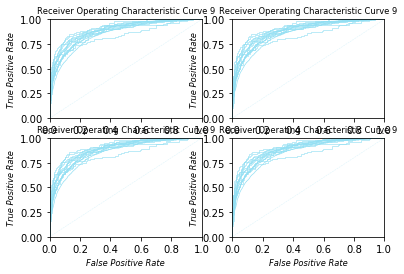

In [17]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt


filename = 'plot_auc/new_encoding_3106_res_1_9.mat'
result = loadmat(filename)
test_y = result['test_y']
pred_y = result['pred_y']

#fig=plt.figure(figsize=(2, 2))
fig = plt.figure()

fig.add_subplot(2, 2, 1)

for i in range(14):
    fpr, tpr, _ = roc_curve(test_y[:, i], pred_y[:, i])
    roc_auc = auc(fpr, tpr)
    slw = 0.6
    if roc_auc < 0.7:
        print(roc_auc)
        slw = 0.1
    plt.plot(fpr, tpr, color='#92DFF3',
             lw=slw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#DBF3FA', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 'small', fontstyle='italic')
plt.ylabel('True Positive Rate', fontsize = 'small', fontstyle='italic')
plt.title('Receiver Operating Characteristic Curve ' + str(f), fontsize = 'small')

fig.add_subplot(2, 2, 2)

for i in range(14):
    fpr, tpr, _ = roc_curve(test_y[:, i], pred_y[:, i])
    roc_auc = auc(fpr, tpr)
    slw = 0.6
    if roc_auc < 0.7:
        print(roc_auc)
        slw = 0.1
    plt.plot(fpr, tpr, color='#92DFF3',
             lw=slw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#DBF3FA', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 'small', fontstyle='italic')
plt.ylabel('True Positive Rate', fontsize = 'small', fontstyle='italic')
plt.title('Receiver Operating Characteristic Curve ' + str(f), fontsize = 'small')

fig.add_subplot(2, 2, 3)

for i in range(14):
    fpr, tpr, _ = roc_curve(test_y[:, i], pred_y[:, i])
    roc_auc = auc(fpr, tpr)
    slw = 0.6
    if roc_auc < 0.7:
        print(roc_auc)
        slw = 0.1
    plt.plot(fpr, tpr, color='#92DFF3',
             lw=slw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#DBF3FA', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 'small', fontstyle='italic')
plt.ylabel('True Positive Rate', fontsize = 'small', fontstyle='italic')
plt.title('Receiver Operating Characteristic Curve ' + str(f), fontsize = 'small')

fig.add_subplot(2, 2, 4)

for i in range(14):
    fpr, tpr, _ = roc_curve(test_y[:, i], pred_y[:, i])
    roc_auc = auc(fpr, tpr)
    slw = 0.6
    if roc_auc < 0.7:
        print(roc_auc)
        slw = 0.1
    plt.plot(fpr, tpr, color='#92DFF3',
             lw=slw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#DBF3FA', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 'small', fontstyle='italic')
plt.ylabel('True Positive Rate', fontsize = 'small', fontstyle='italic')
plt.title('Receiver Operating Characteristic Curve ' + str(f), fontsize = 'small')

plt.show()

0.6505957164122648
0.6893930348258707
0.6855227534583789


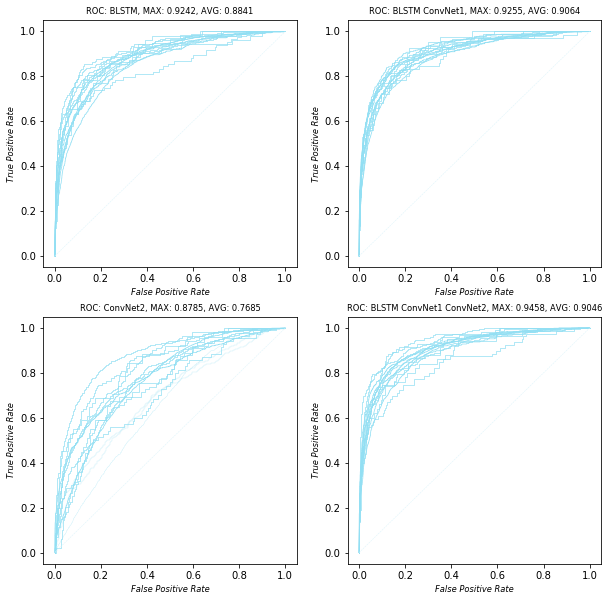

In [34]:
fnames = ['new_encoding_3106_res_1_9.mat', 'new_encoding_3106_lrg_0_9.mat',  'new_pssm_3106_1_9.mat', 'new_encoding_pssm_3106_1_9.mat']
modelname = ['BLSTM', 'BLSTM ConvNet1', 'ConvNet2', 'BLSTM ConvNet1 ConvNet2']
f, axs = plt.subplots(2, 2,  figsize=(10,10))

for m in range(2):
    for n in range(2):
        filename = 'plot_auc/' + fnames[m*2 + n]
        result = loadmat(filename)
        test_y = result['test_y']
        pred_y = result['pred_y']
        fig1 = axs[m,n]
        tmp = []
        for i in range(14):
            fpr, tpr, _ = roc_curve(test_y[:, i], pred_y[:, i])
            roc_auc = auc(fpr, tpr)
            tmp.append(roc_auc)
            slw = 0.7
            if roc_auc < 0.7:
                print(roc_auc)
                slw = 0.2
            fig1.plot(fpr, tpr, color='#92DFF3',
                     lw=slw, label='ROC curve (area = %0.4f)' % roc_auc)
        fig1.plot([0, 1], [0, 1], color='#DBF3FA', lw=0.5, linestyle='--')
        # fig1.xlim([0.0, 1.0])
        # fig1.ylim([0.0, 1.0])
        # fig1.xlabel('False Positive Rate', fontsize = 'small', fontstyle='italic')
        # fig1.ylabel()
        fig1.set_title('ROC: {}, MAX: {:.4f}, AVG: {:.4f}'.format(modelname[m*2 + n], np.amax(tmp), np.average(tmp)), fontsize = 'small')
        fig1.set_xlabel('False Positive Rate', fontsize = 'small', fontstyle='italic')
        fig1.set_ylabel('True Positive Rate', fontsize = 'small', fontstyle='italic')
plt.savefig('auc_3106.pdf')

Text(0, 0.5, 'AP')

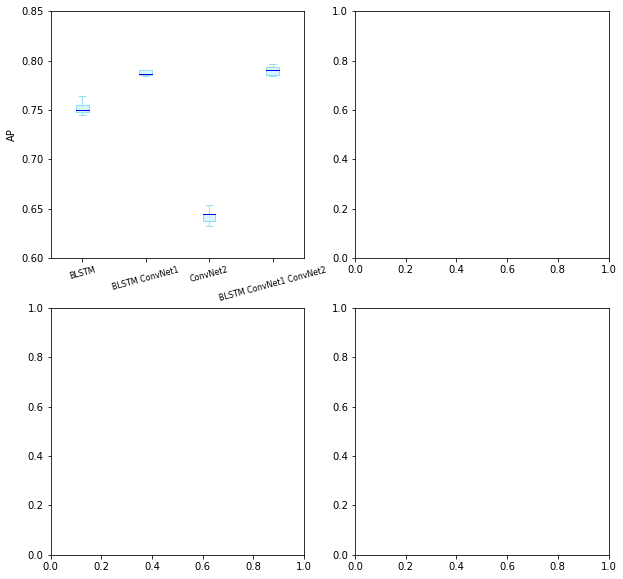

In [69]:
data = np.array([[0.7476, 0.7910, 0.6324, 0.7903], 
        [0.7640, 0.7844, 0.6536, 0.7932], 
        [0.7503, 0.7853, 0.6452, 0.7967], 
        [0.7452, 0.7867, 0.6449, 0.7853], 
        [0.7546, 0.7906, 0.6376, 0.7849]])

f, axs = plt.subplots(3, 2,  figsize=(10,10))
c= '#92DFF3'
axs[0,0].boxplot(data, showfliers=False, widths = 0.2 ,patch_artist=True,
            boxprops=dict(facecolor='#DBF3FA', color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='blue'),)
axs[0,0].set_ylim(0.6,0.85)
axs[0,0].set_xticklabels(modelname,
                    rotation=15, fontsize=8)
axs[0,0].set_ylabel('AP')

rl_data_3 = np.array([[0.0965, 0.0780, 0.1351, 0.0749],
                     [0.0916, 0.0804, 0.1253, 0.0751],
                     [0.0973, 0.0769, 0.1292, 0.0706],
                     [0.1052, 0.0792, 0.1301, 0.0780],
                     [0.0928, 0.0747, 0.1327, 0.0801]])

axs[1,0].boxplot(rl_data_3, showfliers=False, widths = 0.2 ,patch_artist=True,
            boxprops=dict(facecolor='#DBF3FA', color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='blue'),)
axs[1,0].set_ylim(0,0.15)
axs[1,0].set_xticklabels(modelname,
                    rotation=15, fontsize=8)
axs[1,0].set_ylabel('RL')


In [70]:
np.arange(12).reshape((3,4))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
fnames = ['new_encoding_3106_res_1_9.mat', 'new_encoding_3106_lrg_0_9.mat',  'new_pssm_3106_1_9.mat', 'new_encoding_pssm_3106_1_9.mat']
modelname = ['BLSTM', 'BLSTM ConvNet1', 'ConvNet2', 'BLSTM ConvNet1 ConvNet2']

for m in range(1):
    for n in range(1,2):
        filename = 'plot_auc/' + fnames[m*2 + n]
        result = loadmat(filename)
        test_y = result['test_y']
        pred_y = result['pred_y']
        
        for i in range(14):
            fpr, tpr, _ = roc_curve(test_y[:, i], pred_y[:, i])
            roc_auc = auc(fpr, tpr)
            print(roc_auc)

        resmcc = []
        resf1 = []
        tmp = np.zeros(pred_y.shape)
        for t in np.arange(0,1,0.01):
            tmp[pred_y < t] = 0
            tmp[pred_y >= t] = 1
            for i in range(14):
                resmcc.append(matthews_corrcoef(test_y[:,i], tmp[:, i]))
                resf1.append(f1_score(test_y[:,i], tmp[:, i]))
        resmcc = np.array(resmcc).reshape((100, 14))
        resf1 = np.array(resf1).reshape((100, 14))

0.9255170737733093
0.8793988194102381
0.9121427574410383
0.8854034295543729
0.8929722601537202
0.9081201591526373
0.8952041790974375
0.9203119267457502
0.9195485477629536
0.9228298149847833
0.8965229644874453
0.9134301015697137
0.9141606090953999
0.9038841158841158


In [ ]:
np.amax(resmcc, axis = 0)

In [ ]:
np.amax(resf1, axis = 0)

In [76]:
t = loadmat('dataset_3106.mat')

In [78]:
t['label_name']

array([[array(['Centrosome'], dtype='<U10')],
       [array(['Cytoplasm'], dtype='<U9')],
       [array(['Cytoskeleton'], dtype='<U12')],
       [array(['Endosome'], dtype='<U8')],
       [array(['Endoplasmic-Reticulum'], dtype='<U21')],
       [array(['Extracellular'], dtype='<U13')],
       [array(['Golgi-Apparatus'], dtype='<U15')],
       [array(['Lysosome'], dtype='<U8')],
       [array(['Microsome'], dtype='<U9')],
       [array(['Mitochondrion'], dtype='<U13')],
       [array(['Nucleus'], dtype='<U7')],
       [array(['Peroxisome'], dtype='<U10')],
       [array(['Plasma-Membrane'], dtype='<U15')],
       [array(['Synapse'], dtype='<U7')]], dtype=object)

In [ ]:
fnames = ['new_encoding_4802_res_8.mat', 'new_encoding_4802_lrg_6.mat',  
          'new_pssm_4802_7.mat', 'new_encoding_pssm_3106_1_9.mat']
modelname = ['BLSTM', 'BLSTM ConvNet1', 'ConvNet2', 'BLSTM ConvNet1 ConvNet2']
f, axs = plt.subplots(2, 2,  figsize=(10,10))

for m in range(2):
    for n in range(2):
        filename = 'plot_auc/' + fnames[m*2 + n]
        result = loadmat(filename)
        test_y = result['test_y']
        pred_y = result['pred_y']
        fig1 = axs[m,n]
        tmp = []
        for i in range(37):
            fpr, tpr, _ = roc_curve(test_y[:, i], pred_y[:, i])
            roc_auc = auc(fpr, tpr)
            tmp.append(roc_auc)
            slw = 0.7
            if roc_auc < 0.7:
                print(roc_auc)
                slw = 0.2
            fig1.plot(fpr, tpr, color='#92DFF3',
                     lw=slw, label='ROC curve (area = %0.4f)' % roc_auc)
        fig1.plot([0, 1], [0, 1], color='#DBF3FA', lw=0.5, linestyle='--')
        # fig1.xlim([0.0, 1.0])
        # fig1.ylim([0.0, 1.0])
        # fig1.xlabel('False Positive Rate', fontsize = 'small', fontstyle='italic')
        # fig1.ylabel()
        fig1.set_title('ROC: {}, MAX: {:.4f}, AVG: {:.4f}'.format(modelname[m*2 + n], np.amax(tmp), np.average(tmp)), fontsize = 'small')
        fig1.set_xlabel('False Positive Rate', fontsize = 'small', fontstyle='italic')
        fig1.set_ylabel('True Positive Rate', fontsize = 'small', fontstyle='italic')
plt.savefig('auc_4802.pdf')

In [3]:
from scipy.io import loadmat
import numpy as np

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, matthews_corrcoef
from sklearn.metrics import f1_score, precision_score

for c in range(5):
    for f in range(10):
        filename = 'encoding_pssm_4802/new_encoding_pssm_4802_' +str(c) + '_' +  str(f) + '.mat'
        result = loadmat(filename)
        test_y = result['test_y']
        pred_y = result['pred_y']

        tmp = np.zeros(pred_y.shape)


        resauc = []
        for i in range(37):
            if i in [18, 31, 28]:
                continue
            fpr, tpr, _ = roc_curve(test_y[:, i], pred_y[:, i])
            roc_auc = auc(fpr, tpr)
            resauc.append(roc_auc)


        resmcc = []
        resf1 = []
        for t in np.arange(0,1,0.01):
            tmp[pred_y < t] = 0
            tmp[pred_y >= t] = 1
            for i in range(37):
                if i in [18, 31, 28]:
                    continue
                resmcc.append(matthews_corrcoef(test_y[:,i], tmp[:, i]))
                resf1.append(f1_score(test_y[:,i], tmp[:, i]))
        resmcc = np.array(resmcc).reshape((100, 34))
        resf1 = np.array(resf1).reshape((100, 34))

        print('{}, auc: {:.4f}, {:.4f}, mcc: {:.4f}, f1: {:.4f}'.format(f, 
            np.amax(resauc), np.average(resauc), np.amax(resmcc), np.amax(resf1)))
    #     print('{}, auc: {:.4f}, {:.4f}'.format(f,
    #             np.amax(resauc), np.average(resauc)))

0, auc: 0.8033, 0.6762, mcc: 0.4049, f1: 0.6695
1, auc: 0.9352, 0.7462, mcc: 0.5158, f1: 0.7227
2, auc: 0.9058, 0.7946, mcc: 0.5752, f1: 0.7490
3, auc: 0.9124, 0.8152, mcc: 0.5885, f1: 0.7599
4, auc: 0.9308, 0.8300, mcc: 0.5975, f1: 0.7635
5, auc: 0.9610, 0.8464, mcc: 0.6083, f1: 0.7685
6, auc: 0.9590, 0.8509, mcc: 0.6177, f1: 0.7730
7, auc: 0.9627, 0.8593, mcc: 0.6171, f1: 0.7718
8, auc: 0.9409, 0.8658, mcc: 0.6215, f1: 0.7739
9, auc: 0.9792, 0.8695, mcc: 0.6144, f1: 0.7743
0, auc: 0.8137, 0.6841, mcc: 0.3998, f1: 0.6474
1, auc: 0.8999, 0.7659, mcc: 0.5179, f1: 0.7090
2, auc: 0.9538, 0.8091, mcc: 0.5817, f1: 0.7395
3, auc: 0.9500, 0.8322, mcc: 0.6116, f1: 0.7572
4, auc: 0.9719, 0.8552, mcc: 0.6099, f1: 0.7580
5, auc: 0.9752, 0.8541, mcc: 0.6070, f1: 0.7603
6, auc: 0.9668, 0.8717, mcc: 0.6238, f1: 0.7718
7, auc: 0.9840, 0.8721, mcc: 0.6290, f1: 0.7719
8, auc: 0.9796, 0.8828, mcc: 0.6292, f1: 0.7690
9, auc: 0.9810, 0.8843, mcc: 0.6301, f1: 0.7726
0, auc: 0.8508, 0.6738, mcc: 0.4005, f1: